## 두번째

### Single-layer neural network for classification problem

1회차에서는 Single-layer neural network를 활용해 Regression problem (우리가 예측하려는 값이 정수형이고, 그 높고 낮음을 예측하는 문제. 부동산이나 주식의 집값 예측 등)을 풀어보았습니다. 이번 회차에는 1회차에서 배운 내용을 응용하여, 예측하려는 값이 어느 분류에 속하는지를 판단하는 Classification problem (상품 카테고리 분류, 폐암의 양성/음성 여부 등)을 해결하는 Single-layer neural network를 구현합니다.

이후 우편번호의 필기체 이미지를 정리한 MNIST 데이터셋을 활용하여, 이미지에 아무런 사전 처리(preprocessing)를 거치지 않은 채 픽셀과 RGB 값만 넣으면 그 안에 그려져 있는 숫자를 스스로 인식하는 숫자 인식 알고리즘을 Single-layer neural network로 구현합니다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

/Users/ticonweb/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:279: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


## Generate dataset

실험하기 유용한 데이터셋

In [4]:
x1 = np.random.uniform(low=-1.0, high=1.0, size=100)

print(x1.shape)
print(x1[0:10])

(100,)
[ 0.8559826  -0.33229889 -0.55853483 -0.36631809  0.15906325  0.56652452
 -0.98537142 -0.85450743  0.51954957  0.56637136]


In [5]:
x2 = np.random.uniform(low=-1.0, high=1.0, size=100)

print(x2.shape)
print(x2[0:10])

(100,)
[-0.38504932  0.40406128 -0.00647433 -0.17923855  0.75648195 -0.90350251
  0.56187899  0.0146957   0.19397852  0.17752021]


In [8]:
y = x1 * 0.3 + x2 * 0.5 + 0.1 + (np.random.uniform(low=-1.0, high=1.0) * 0.05)

print(y.shape)
print(y[0:10])

(100,)
[ 0.20845563  0.24652648 -0.02661211 -0.05532919  0.57014546 -0.13760839
  0.12951357 -0.10481887  0.39703964  0.40285702]


In [12]:
y = y >= 0.0

# True : 1, False : 0

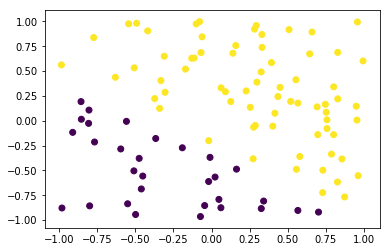

In [13]:
plt.scatter(x1, x2, c=y)
plt.show()

위 문제를 풀어보는 것이 문제

### Gradient Descent

In [14]:
# 시그모이드 함수 생성

def sigmoid(n):
    return 1 / (1 + np.exp(-n))


In [15]:
print(sigmoid(-9))
print(sigmoid(0))
print(sigmoid(9))

0.000123394575986
0.5
0.999876605424


In [17]:
xx = np.linspace(start=-10.0, stop=+10.0)
# -10 부터 10까지의 거의 모든 값을 평등하게
xx

array([-10.        ,  -9.59183673,  -9.18367347,  -8.7755102 ,
        -8.36734694,  -7.95918367,  -7.55102041,  -7.14285714,
        -6.73469388,  -6.32653061,  -5.91836735,  -5.51020408,
        -5.10204082,  -4.69387755,  -4.28571429,  -3.87755102,
        -3.46938776,  -3.06122449,  -2.65306122,  -2.24489796,
        -1.83673469,  -1.42857143,  -1.02040816,  -0.6122449 ,
        -0.20408163,   0.20408163,   0.6122449 ,   1.02040816,
         1.42857143,   1.83673469,   2.24489796,   2.65306122,
         3.06122449,   3.46938776,   3.87755102,   4.28571429,
         4.69387755,   5.10204082,   5.51020408,   5.91836735,
         6.32653061,   6.73469388,   7.14285714,   7.55102041,
         7.95918367,   8.36734694,   8.7755102 ,   9.18367347,
         9.59183673,  10.        ])

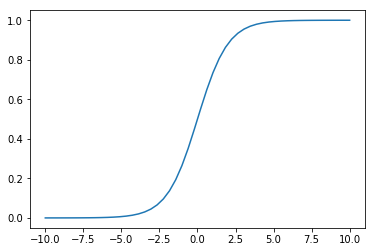

In [18]:
yy = sigmoid(xx)
plt.plot(xx, yy)
plt.show()

여기까지 시그모이드 완성!!!

#### Gradient descent sigmoid classification problem 구현!!

In [21]:
num_epoch = 100

w1 = np.random.uniform(low=0.0, high=1.0)
w2 = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
    # 스쿼싱 하기
    y_predict = x1 * w1 + x2 * w2 + b
    y_predict = sigmoid(y_predict)
    
    
    # 0, 1 확률을 알고 싶다면 아래 코드를 주석!!
    predict = (y_predict >= 0.5)
    actual = y
    
    error = (predict != actual).mean()
    if error < 0.01:
        break
        
    if epoch % 10 == 0:
        print("{0:2} error = {1:.5f}".format(epoch, error))
    
    # w1, w2 업데이트
    w1 = w1 - ((y_predict - y) * x1).mean()
    w2 = w2 - ((y_predict - y) * x2).mean()
    b = b - (y_predict - y).mean()
    
print("-----" * 10)
print("{0:2} error = {1:.5f}".format(epoch, error))

 0 error = 0.29000
10 error = 0.09000
20 error = 0.03000
--------------------------------------------------
28 error = 0.00000


In [ ]:
시그모이드는 0이나 1로 나오지 않기 때문에 0.5 을 기준으로 T, F 로 정한다.

시그모이드의 장점

- 0, 1 스쿼싱도 해준다.
- 그리고 위 0, 1 의 확률도 알 수 있다.

In [22]:
w1, w2, b

# 왜 0.3, 0.5, 0.1 이 아닌가요???

(2.0329725769915963, 2.5334671729745364, 0.89127675263960937)

In [25]:
import pandas as pd

y_predict = x1 * w1 + x2 * w2 + b
y_predict = sigmoid(y_predict)

predict = (y_predict >= 0.5)

pd.DataFrame({'x1': x1, 'x2': x2, 'y(actual)': y, 'y(predict)': predict}).head()

,x1,x2,y(actual),y(predict)
0,0.855983,-0.385049,True,True
1,-0.332299,0.404061,True,True
2,-0.558535,-0.006474,False,False
3,-0.366318,-0.179239,False,False
4,0.159063,0.756482,True,True


In [26]:
# Decision boundary 그리기

xxx = np.linspace(start=-1.0, stop=1.0)
yyy = -1.0 * (w1 * xxx + b) / w2

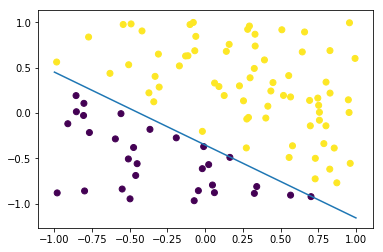

In [27]:
plt.plot(xxx, yyy)
plt.scatter(x1, x2, c=y)
plt.show()

# Decision boundary 그리기